### 1. Data Loading & Exploration

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, learning_curve
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, RocCurveDisplay, accuracy_score, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_palette("viridis")
plt.style.use('ggplot')

# Load data
data = pd.read_csv("creditcard.csv")
print("First 5 rows of the dataset:")
print(data.head())
print("\nDataset shape (rows, columns):", data.shape)
print("\nColumn names:", list(data.columns))
print("\nDataset information:")
data.info()
print("\nDescriptive statistics:")
print(data.describe())


First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

   

### 2. Visual Data Analysis

Fraud vs Non-Fraud statistics (heatmaps)

Class distribution (pie and count plot)

Correlation heatmap

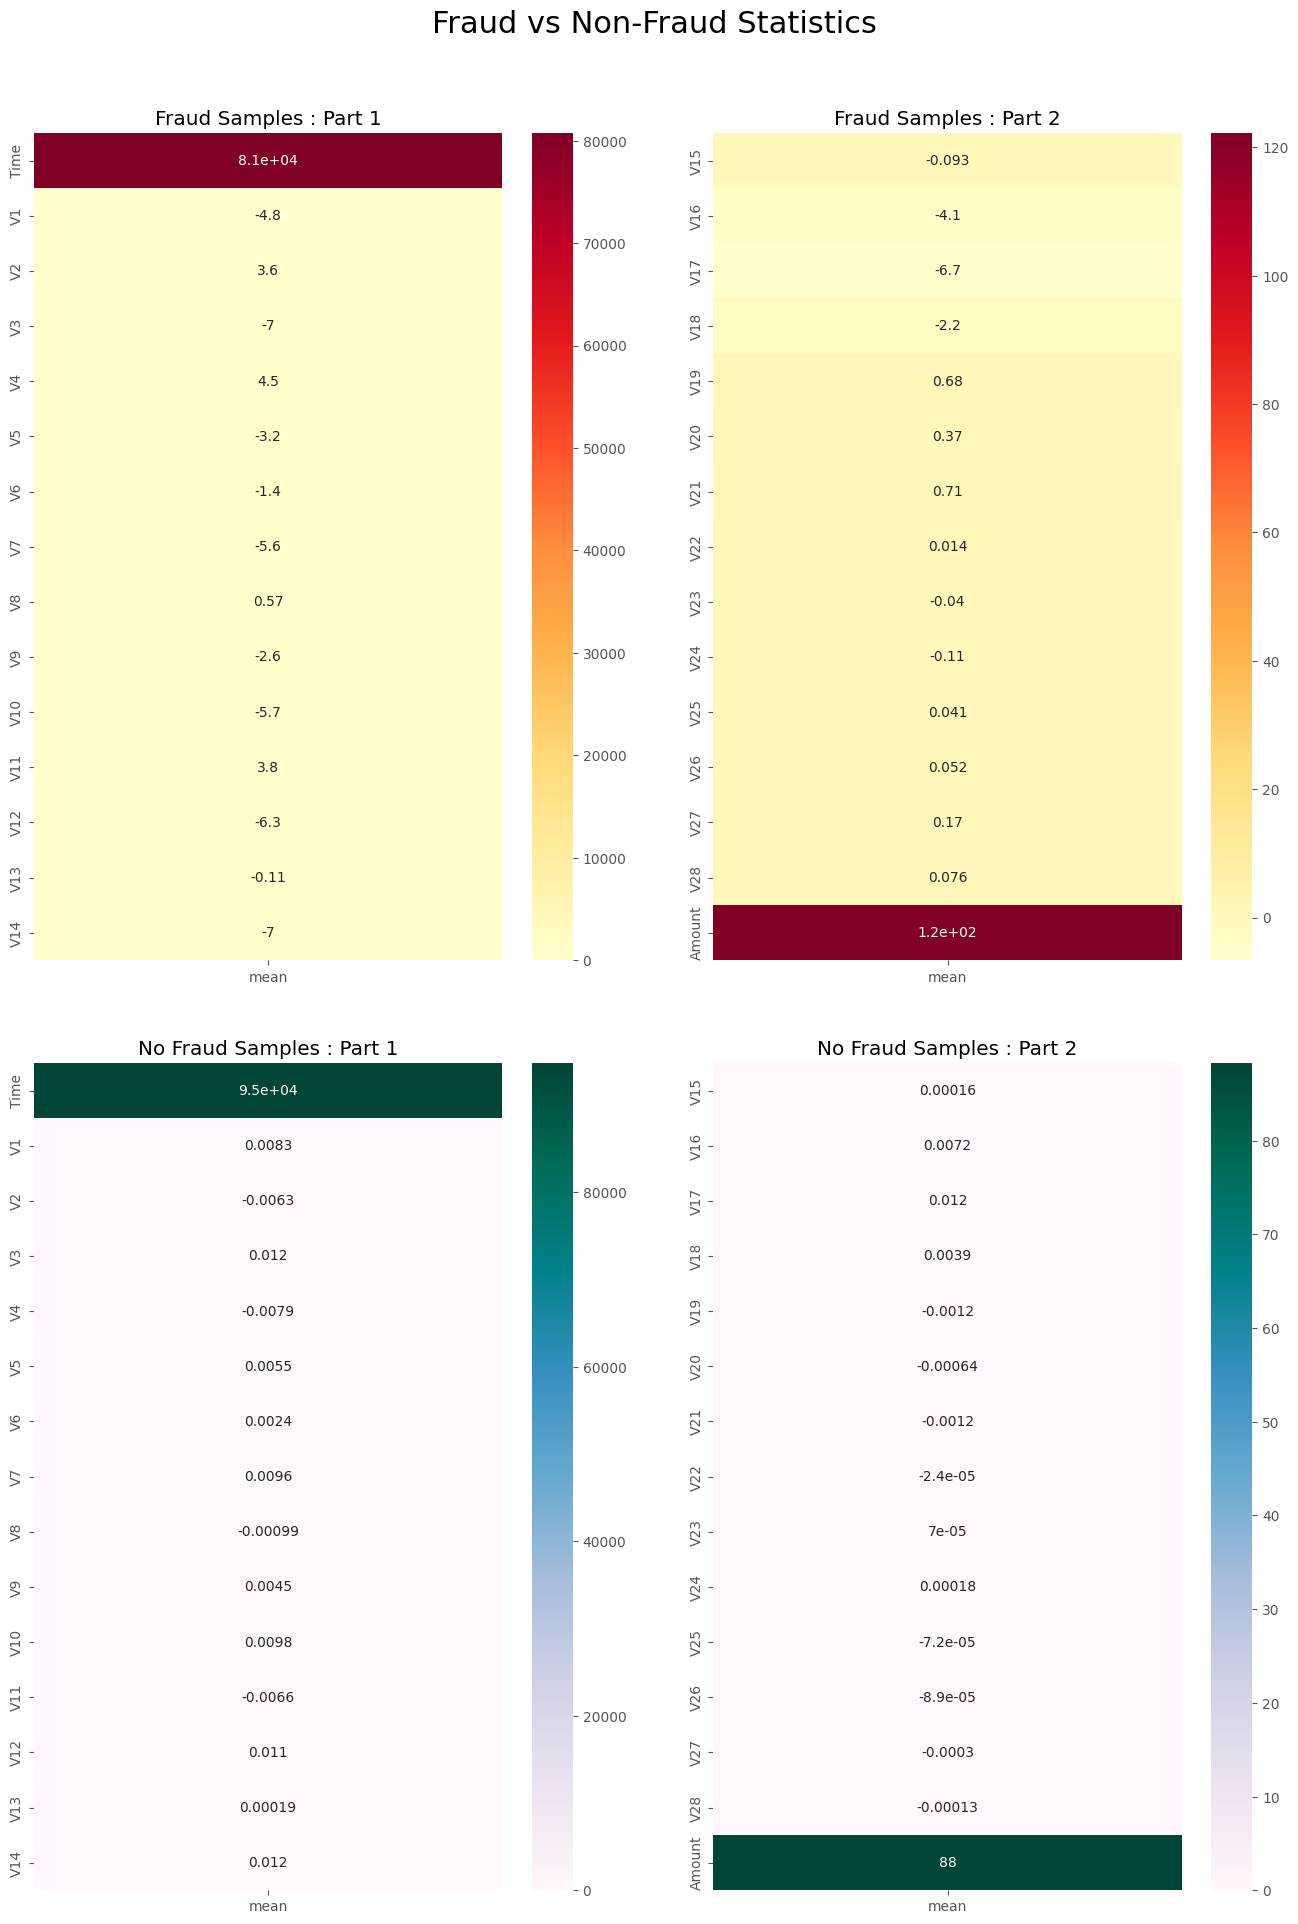

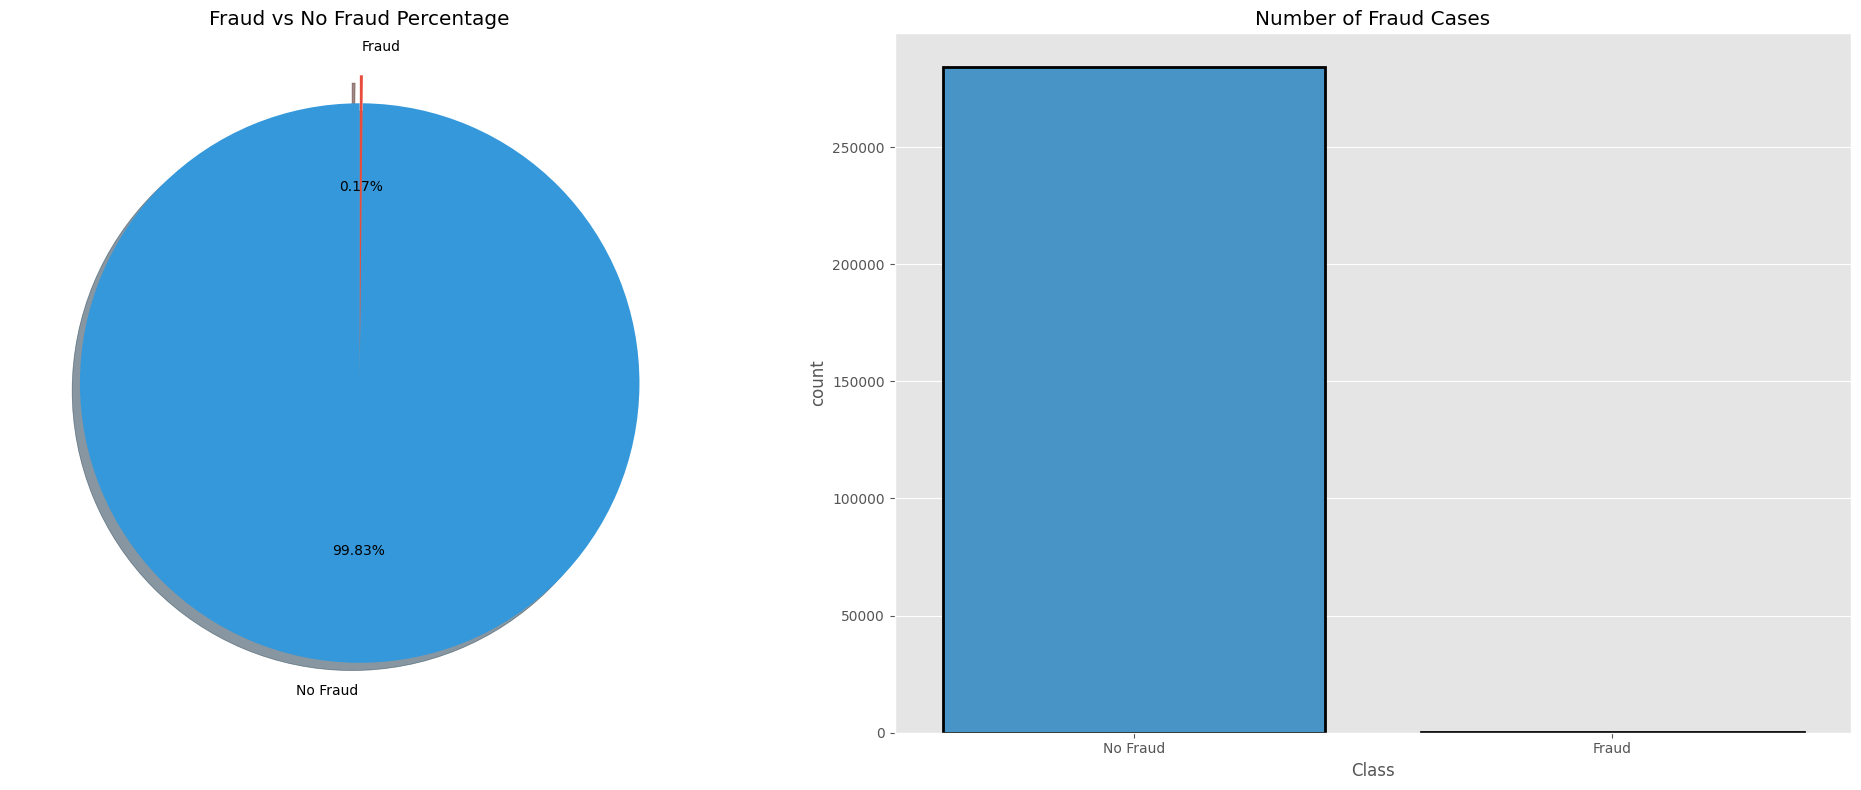

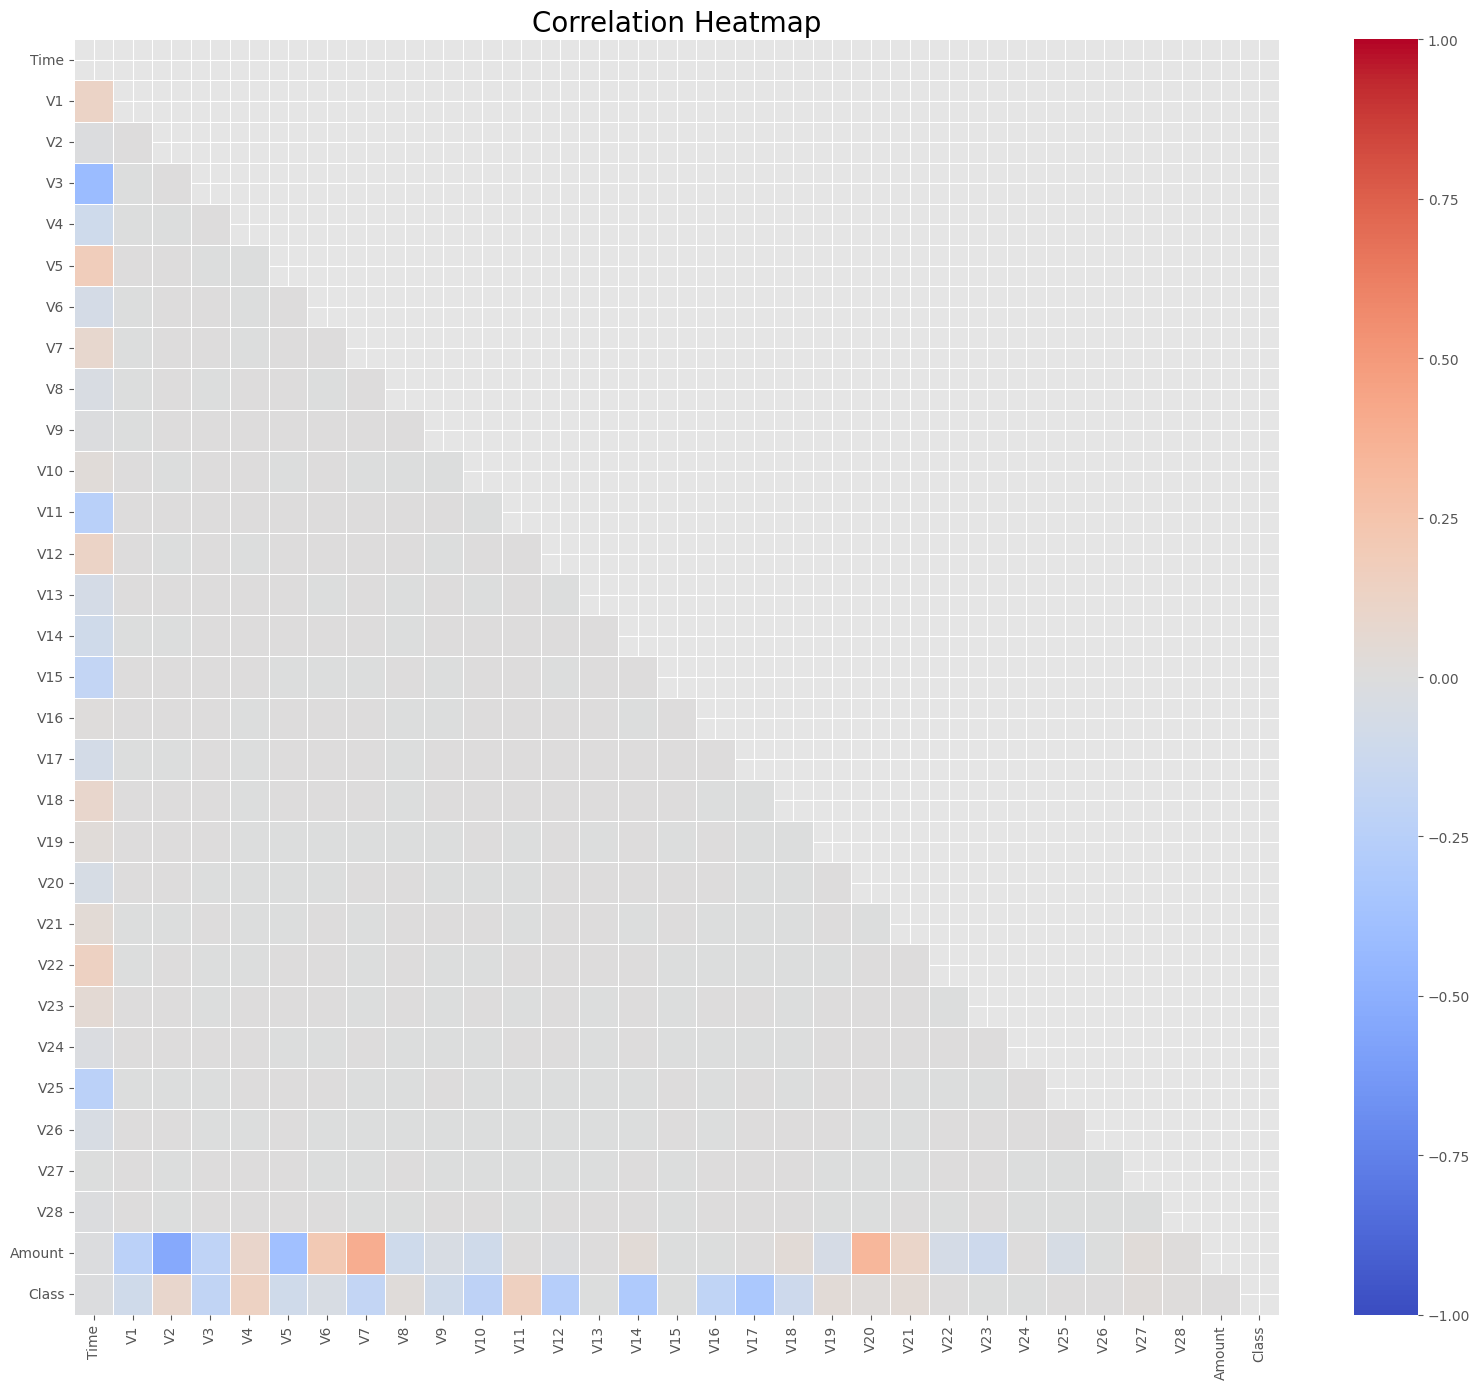

In [6]:
# Fraud vs Non-Fraud statistics
fraud = data[data['Class'] == 1].describe().T
nofraud = data[data['Class'] == 0].describe().T

fig, ax = plt.subplots(2, 2, figsize=(14, 20))
sns.heatmap(fraud[['mean']][:15], annot=True, cmap='YlOrRd', ax=ax[0, 0])
ax[0, 0].set_title('Fraud Samples : Part 1')
sns.heatmap(fraud[['mean']][15:30], annot=True, cmap='YlOrRd', ax=ax[0, 1])
ax[0, 1].set_title('Fraud Samples : Part 2')
sns.heatmap(nofraud[['mean']][:15], annot=True, cmap='PuBuGn', ax=ax[1, 0])
ax[1, 0].set_title('No Fraud Samples : Part 1')
sns.heatmap(nofraud[['mean']][15:30], annot=True, cmap='PuBuGn', ax=ax[1, 1])
ax[1, 1].set_title('No Fraud Samples : Part 2')
fig.suptitle('Fraud vs Non-Fraud Statistics', fontsize=22)
plt.tight_layout(pad=4)
plt.show()

# Class distribution
fraud_percent = len(data[data['Class'] == 1]) / len(data) * 100
nofraud_percent = len(data[data['Class'] == 0]) / len(data) * 100
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.pie([nofraud_percent, fraud_percent], labels=['No Fraud', 'Fraud'], autopct='%1.2f%%',
        startangle=90, colors=['#3498db', '#e74c3c'], explode=(0, 0.1), shadow=True)
plt.title('Fraud vs No Fraud Percentage')
plt.subplot(1, 2, 2)
ax = sns.countplot(x='Class', data=data, palette=[
                   '#3498db', '#e74c3c'], edgecolor='black', linewidth=2)
ax.set_xticklabels(['No Fraud', 'Fraud'])
plt.title('Number of Fraud Cases')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(16, 14))
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm',
            annot=False, linewidths=0.5, vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap', fontsize=20)
plt.tight_layout()
plt.show()


### 3. Data Preparation and Resampling

In [7]:
X = data.drop('Class', axis=1)
y = data['Class']
print('\nOriginal dataset class distribution:')
print(Counter(y))

# SMOTE + UnderSampling
over = SMOTE(sampling_strategy=0.5, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.1, random_state=42)
pipeline = Pipeline([('under', under), ('over', over)])
X_resampled, y_resampled = pipeline.fit_resample(X, y)
print('Resampled dataset class distribution:')
print(Counter(y_resampled))

# Scaling
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled_scaled, y_resampled, test_size=0.2, random_state=2)



Original dataset class distribution:
Counter({0: 284315, 1: 492})
Resampled dataset class distribution:
Counter({0: 4920, 1: 2460})


### 4. Model Training, Evaluation, and Comparison


===== Logistic Regression =====
Cross Validation Score :  99.37%
ROC_AUC Score :  97.09%
Accuracy Score :  97.70%


<Figure size 1000x800 with 0 Axes>

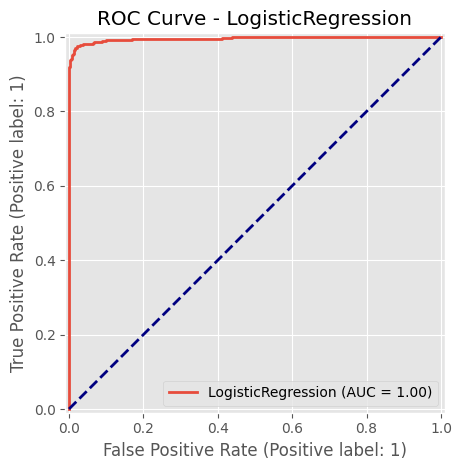

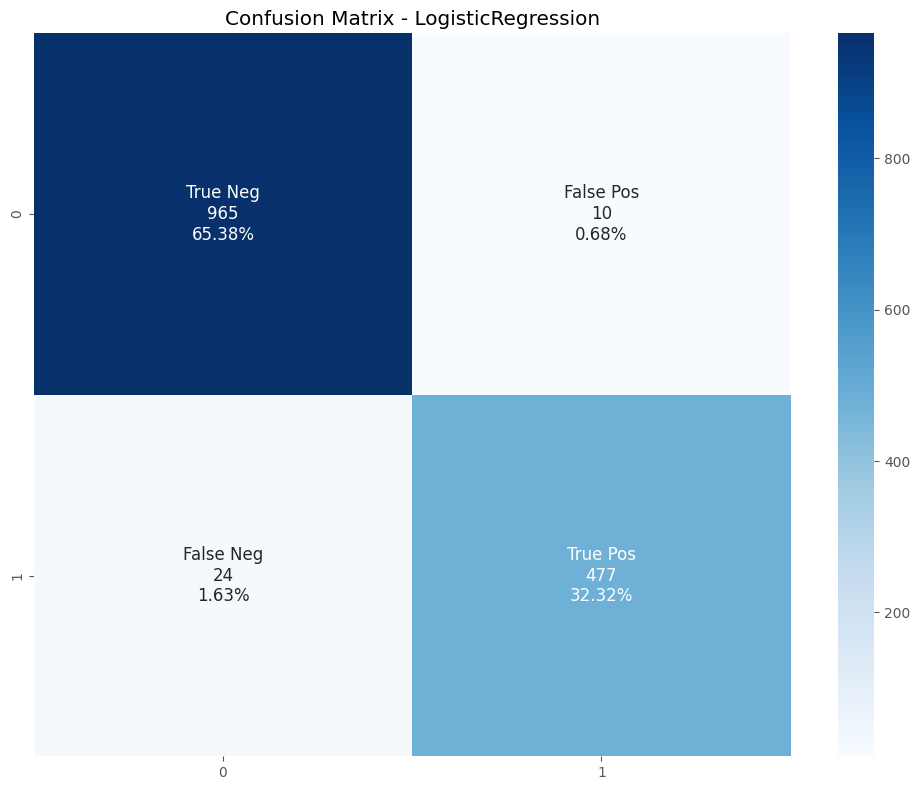


Classification Report - LogisticRegression:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       975
           1       0.98      0.95      0.97       501

    accuracy                           0.98      1476
   macro avg       0.98      0.97      0.97      1476
weighted avg       0.98      0.98      0.98      1476


===== SVC =====
Cross Validation Score :  99.34%
ROC_AUC Score :  96.10%
Accuracy Score :  97.09%


<Figure size 1000x800 with 0 Axes>

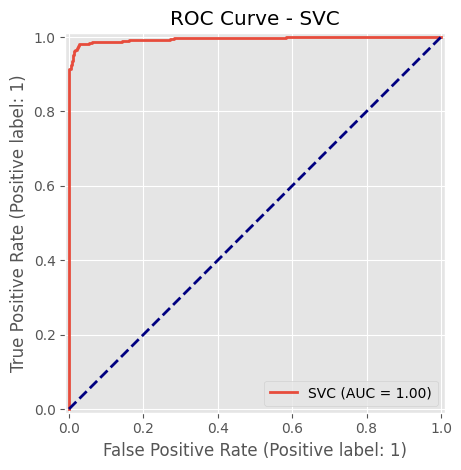

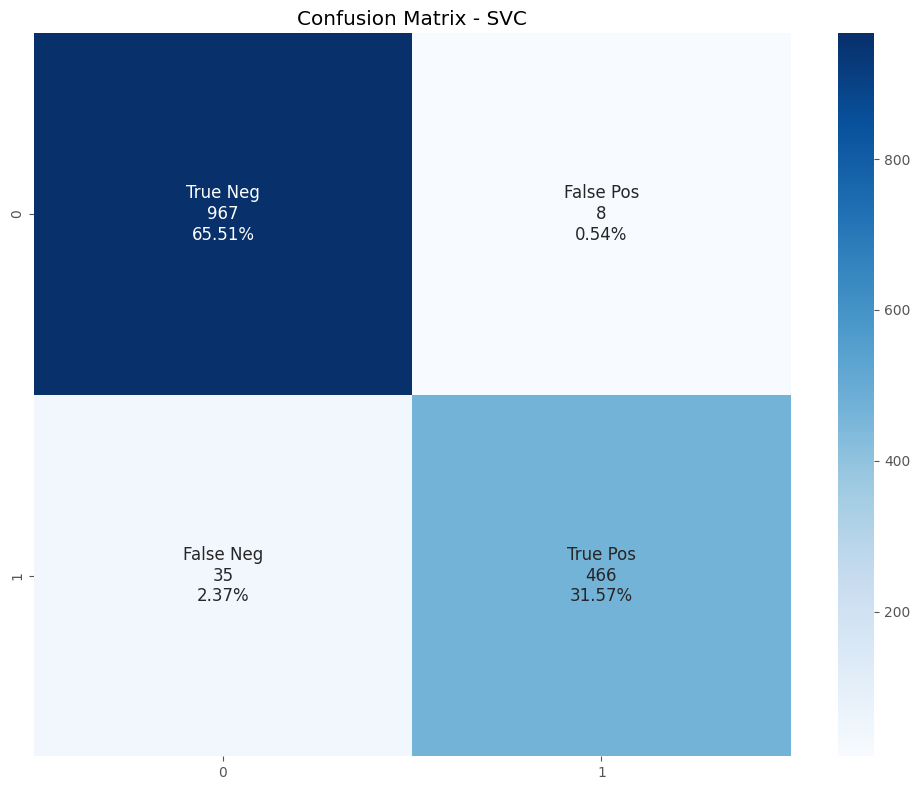


Classification Report - SVC:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       975
           1       0.98      0.93      0.96       501

    accuracy                           0.97      1476
   macro avg       0.97      0.96      0.97      1476
weighted avg       0.97      0.97      0.97      1476


===== Decision Tree =====
Cross Validation Score :  97.59%
ROC_AUC Score :  95.00%
Accuracy Score :  96.48%


<Figure size 1000x800 with 0 Axes>

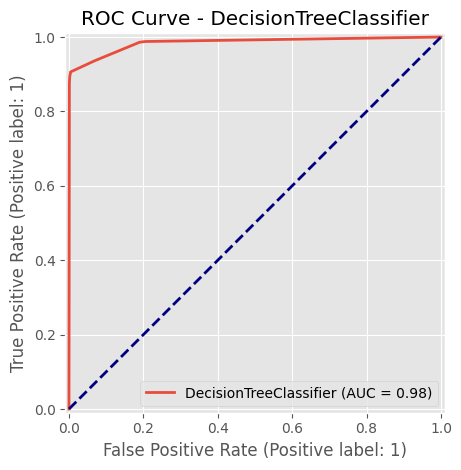

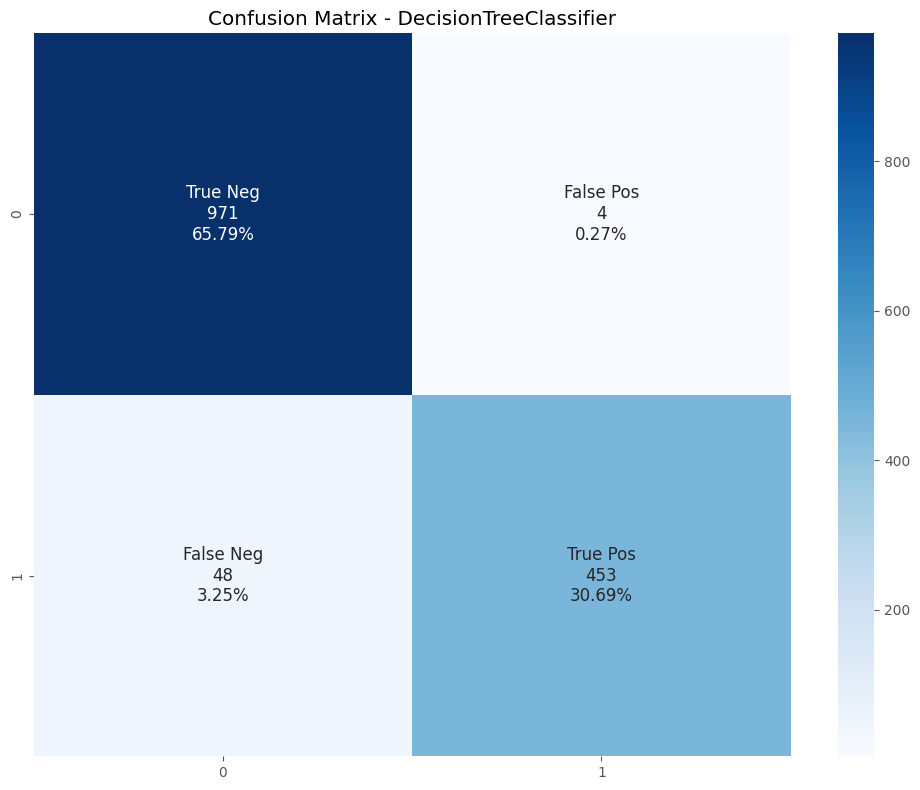


Classification Report - DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       975
           1       0.99      0.90      0.95       501

    accuracy                           0.96      1476
   macro avg       0.97      0.95      0.96      1476
weighted avg       0.97      0.96      0.96      1476


===== Random Forest =====
Cross Validation Score :  98.86%
ROC_AUC Score :  94.66%
Accuracy Score :  96.34%


<Figure size 1000x800 with 0 Axes>

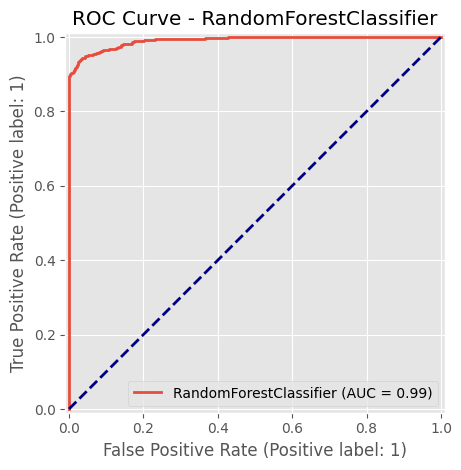

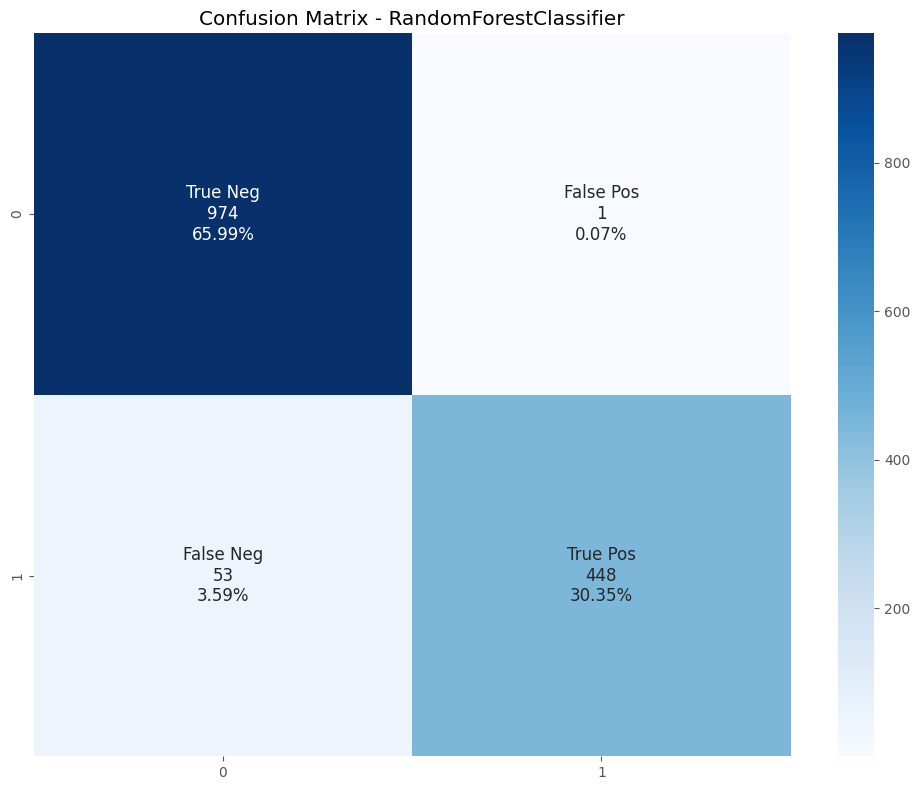


Classification Report - RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       975
           1       1.00      0.89      0.94       501

    accuracy                           0.96      1476
   macro avg       0.97      0.95      0.96      1476
weighted avg       0.97      0.96      0.96      1476


===== KNN =====
Cross Validation Score :  99.35%
ROC_AUC Score :  99.35%
Accuracy Score :  99.46%


<Figure size 1000x800 with 0 Axes>

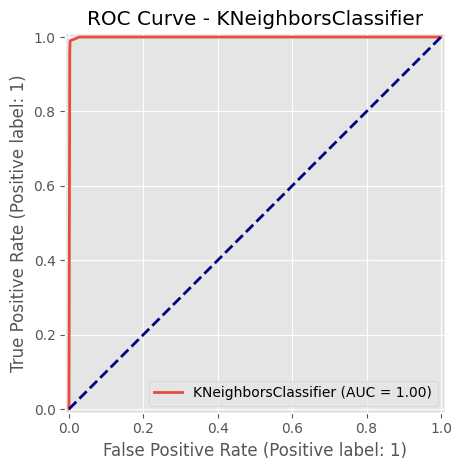

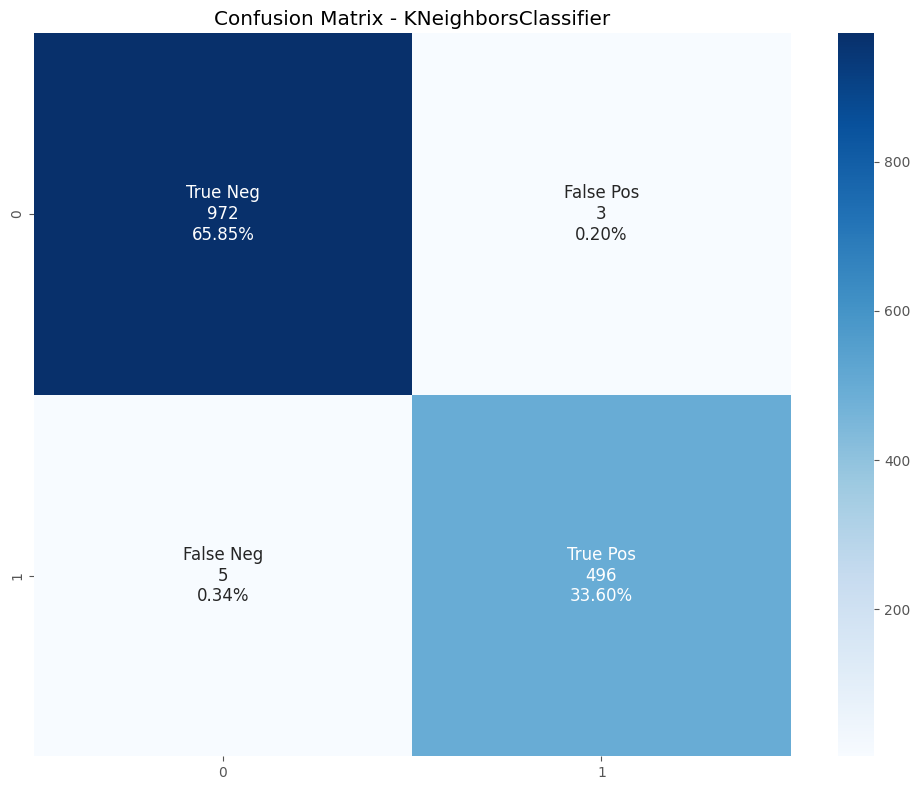


Classification Report - KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       975
           1       0.99      0.99      0.99       501

    accuracy                           0.99      1476
   macro avg       0.99      0.99      0.99      1476
weighted avg       0.99      0.99      0.99      1476


===== Model Performance Comparison =====
              Model  Cross Validation Score  ROC AUC Score  Accuracy
                KNN                0.993483       0.993472  0.994580
Logistic Regression                0.993732       0.970920  0.976965
                SVC                0.993427       0.960967  0.970867
      Decision Tree                0.975926       0.950045  0.964770
      Random Forest                0.988628       0.946593  0.963415


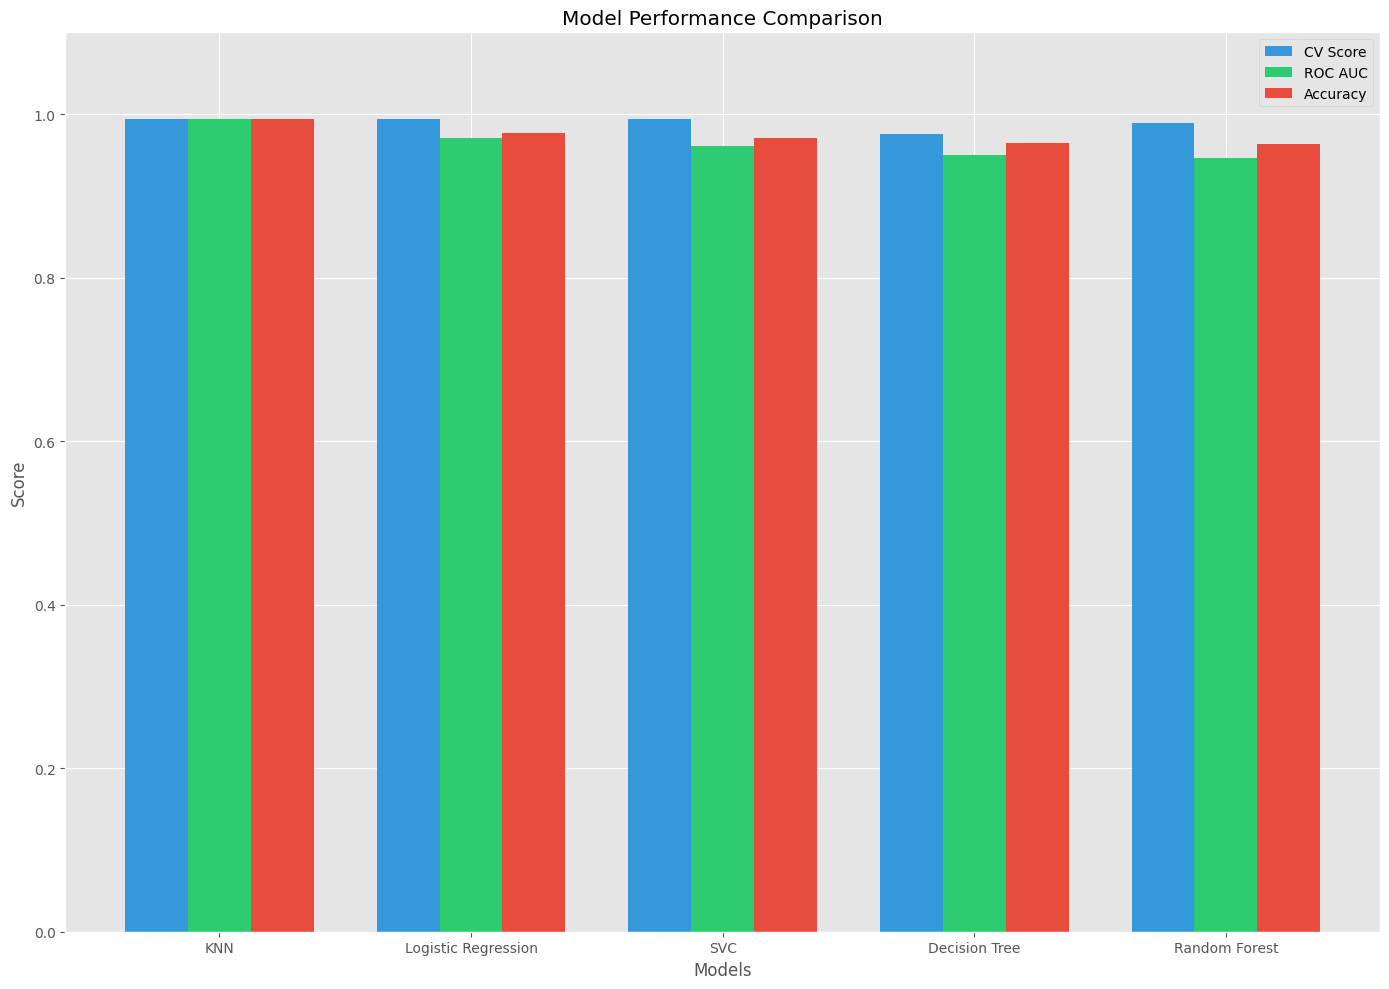

In [8]:
def model(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv_score = cross_val_score(
        classifier, X_train, y_train, cv=cv, scoring='roc_auc').mean()
    print("Cross Validation Score : ", '{0:.2%}'.format(cv_score))
    roc_score = roc_auc_score(y_test, prediction)
    print("ROC_AUC Score : ", '{0:.2%}'.format(roc_score))
    acc_score = accuracy_score(y_test, prediction)
    print("Accuracy Score : ", '{0:.2%}'.format(acc_score))
    plt.figure(figsize=(10, 8))
    RocCurveDisplay.from_estimator(
        classifier, X_test, y_test, lw=2, color='#e74c3c')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title(f'ROC Curve - {classifier.__class__.__name__}')
    plt.tight_layout()
    plt.show()


def model_evaluation(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value)
                   for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2,
              v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=labels, cmap='Blues', fmt='', annot_kws={"size": 12})
    plt.title(f'Confusion Matrix - {classifier.__class__.__name__}')
    plt.tight_layout()
    plt.show()
    print(f"\nClassification Report - {classifier.__class__.__name__}:")
    print(classification_report(y_test, y_pred))


# Model definitions
classifier_lr = LogisticRegression(
    random_state=0, C=10, penalty='l2', max_iter=2000, solver='lbfgs')
classifier_svc = SVC(kernel='linear', C=0.1, probability=True, random_state=0)
classifier_dt = DecisionTreeClassifier(
    random_state=1000, max_depth=4, min_samples_leaf=1)
classifier_rf = RandomForestClassifier(max_depth=4, random_state=0)
classifier_knn = KNeighborsClassifier(leaf_size=1, n_neighbors=3, p=1)

models = {
    'Logistic Regression': classifier_lr,
    'SVC': classifier_svc,
    'Decision Tree': classifier_dt,
    'Random Forest': classifier_rf,
    'KNN': classifier_knn
}

# Train and evaluate all models
for name, clf in models.items():
    print(f"\n===== {name} =====")
    model(clf, X_train, y_train, X_test, y_test)
    model_evaluation(clf, X_test, y_test)

# Model performance comparison


def get_model_metrics(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    cv_score = cross_val_score(
        classifier, X_train, y_train, cv=cv, scoring='roc_auc').mean()
    roc_score = roc_auc_score(y_test, y_pred)
    acc_score = accuracy_score(y_test, y_pred)
    return cv_score, roc_score, acc_score


results = []
for name, model_obj in models.items():
    cv_score, roc_score, acc_score = get_model_metrics(
        model_obj, X_train, y_train, X_test, y_test)
    results.append({'Model': name, 'Cross Validation Score': cv_score,
                   'ROC AUC Score': roc_score, 'Accuracy': acc_score})

results_df = pd.DataFrame(results).sort_values(
    by='ROC AUC Score', ascending=False)
print("\n===== Model Performance Comparison =====")
print(results_df.to_string(index=False))

plt.figure(figsize=(14, 10))
x = np.arange(len(models))
width = 0.25
plt.bar(x - width, results_df['Cross Validation Score'],
        width, label='CV Score', color='#3498db')
plt.bar(x, results_df['ROC AUC Score'], width,
        label='ROC AUC', color='#2ecc71')
plt.bar(x + width, results_df['Accuracy'],
        width, label='Accuracy', color='#e74c3c')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, results_df['Model'])
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()


### 5. Overfitting Check: Learning Curves


===== Checking for Potential Overfitting =====


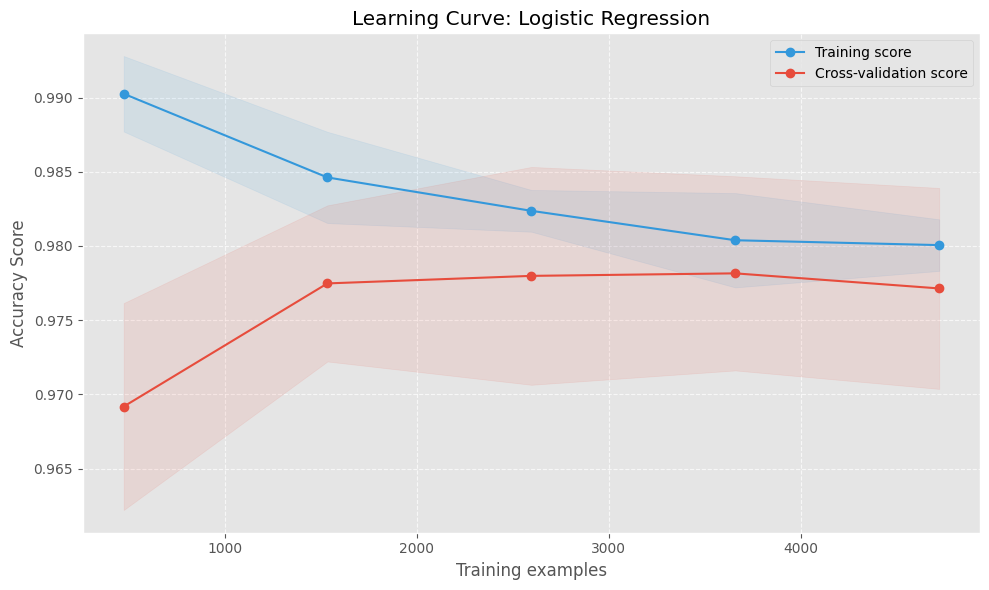

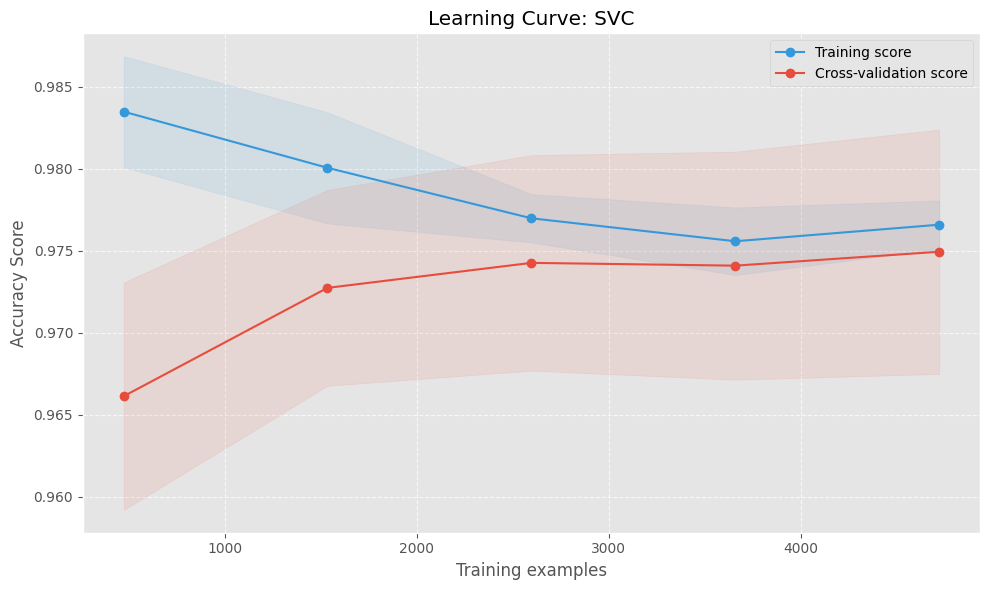

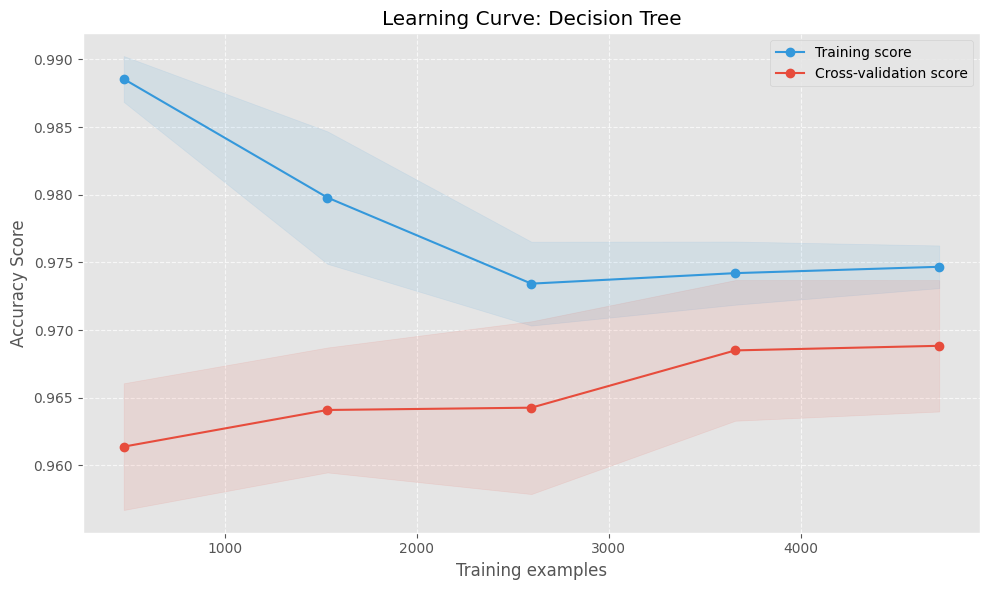

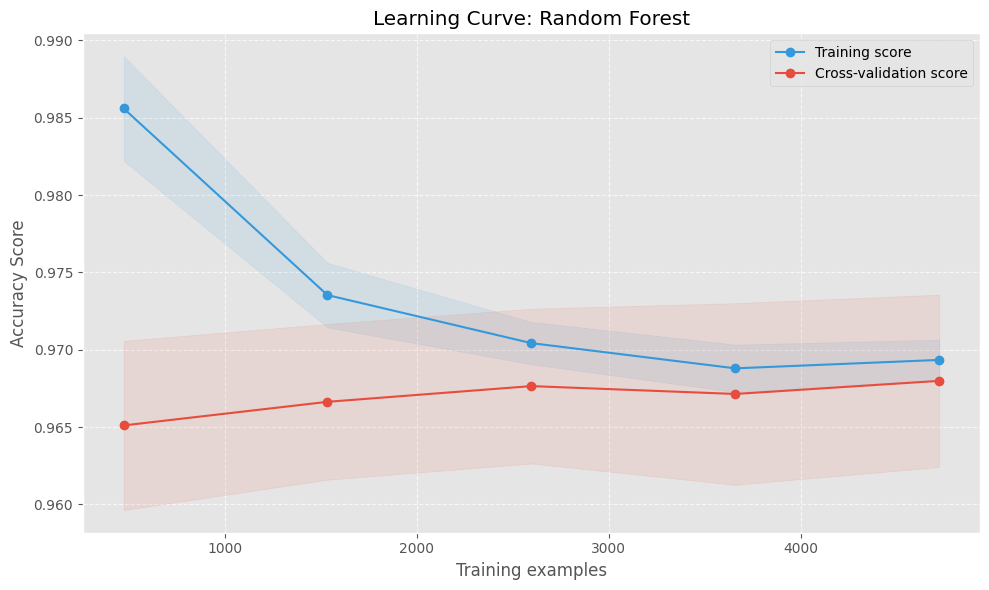

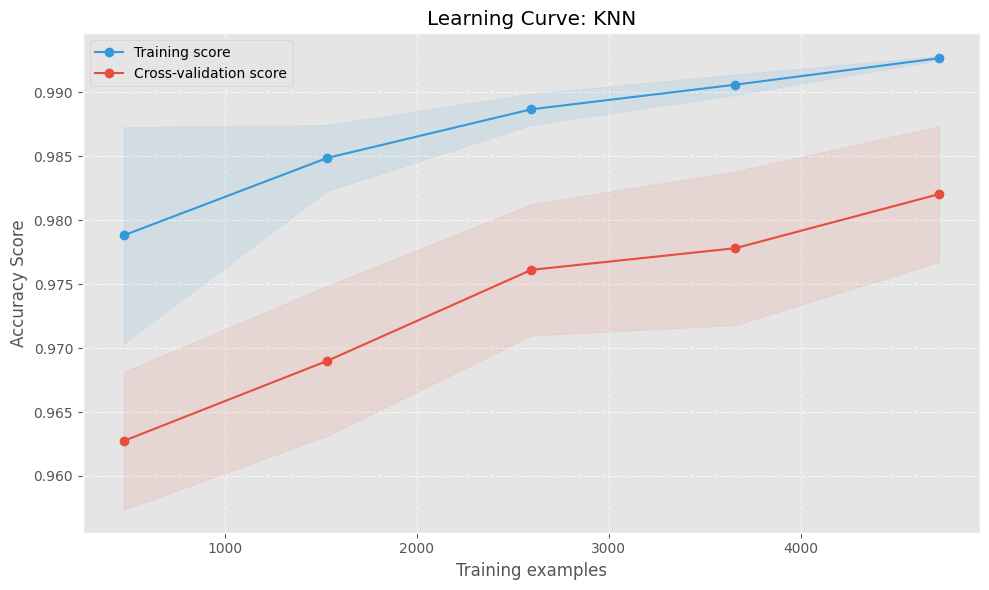

In [9]:
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5),
        scoring='accuracy'
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.figure(figsize=(10, 6))
    plt.title(f"Learning Curve: {title}")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy Score")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.fill_between(train_sizes, train_mean - train_std,
                     train_mean + train_std, alpha=0.1, color="#3498db")
    plt.fill_between(train_sizes, test_mean - test_std,
                     test_mean + test_std, alpha=0.1, color="#e74c3c")
    plt.plot(train_sizes, train_mean, 'o-',
             color="#3498db", label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="#e74c3c",
             label="Cross-validation score")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()


print("\n===== Checking for Potential Overfitting =====")
for name, clf in models.items():
    plot_learning_curve(clf, X_train, y_train, name)


### 6. Evaluation on Original Imbalanced Data

Logistic Regression:
  Accuracy on original imbalanced data: 0.9994
  ROC AUC score on original imbalanced data: 0.8392
  Precision for fraud detection: 0.8906
  Recall for fraud detection: 0.6786
  F1 score for fraud detection: 0.7703


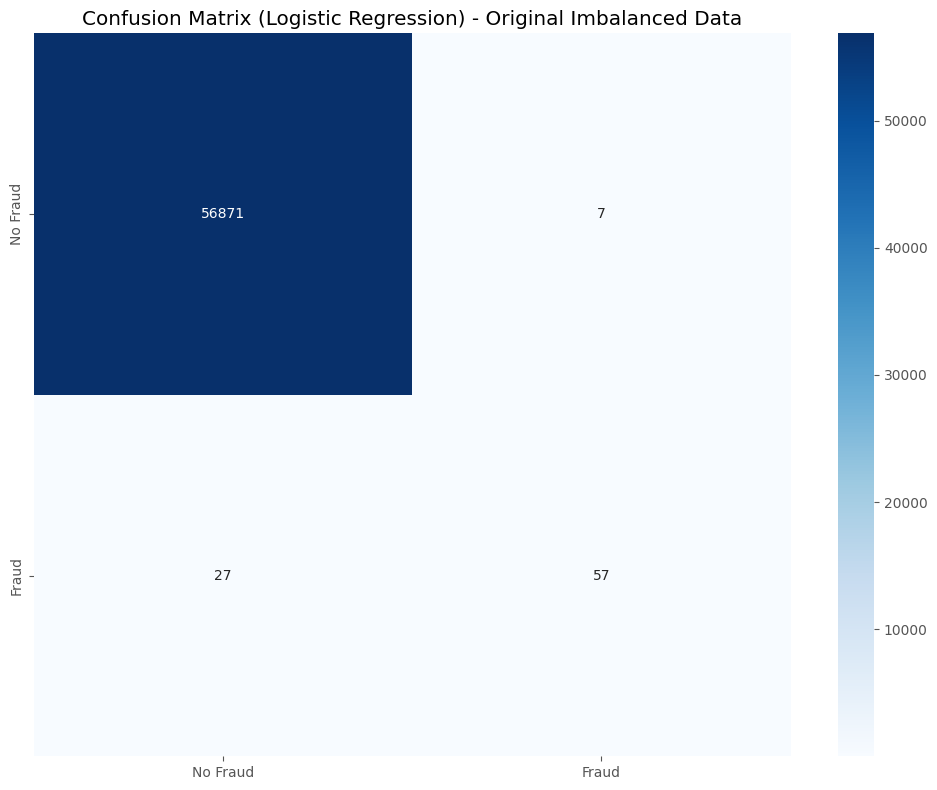

In [ ]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X, y, test_size=0.2, random_state=2)

# Fit scaler only on training data
scaler_orig = StandardScaler()
X_train_orig_scaled = scaler_orig.fit_transform(X_train_orig)
X_test_orig_scaled = scaler_orig.transform(
    X_test_orig)  # Only transform test data


def evaluate_on_original_data(classifier, name):
    # Create a clone of the model to avoid modifying the original
    from sklearn.base import clone
    model_clone = clone(classifier)

    # Train the clone on original imbalanced data
    model_clone.fit(X_train_orig_scaled, y_train_orig)
    y_pred = model_clone.predict(X_test_orig_scaled)

    # Calculate metrics
    acc = accuracy_score(y_test_orig, y_pred)
    roc = roc_auc_score(y_test_orig, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_test_orig, y_pred, average=None, labels=[1])

    # Print results
    print(f"{name}:")
    print(f"  Accuracy on original imbalanced data: {acc:.4f}")
    print(f"  ROC AUC score on original imbalanced data: {roc:.4f}")
    print(f"  Precision for fraud detection: {precision[0]:.4f}")
    print(f"  Recall for fraud detection: {recall[0]:.4f}")
    print(f"  F1 score for fraud detection: {f1[0]:.4f}")

    # Confusion matrix
    cm = confusion_matrix(y_test_orig, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Fraud', 'Fraud'],
                yticklabels=['No Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix ({name}) - Original Imbalanced Data')
    plt.tight_layout()
    plt.show()

    return acc, roc, precision[0], recall[0], f1[0]


# Evaluate models on original data without changing the originals
original_results = []
for name, clf in models.items():
    acc, roc, precision, recall, f1 = evaluate_on_original_data(clf, name)
    original_results.append({'Model': name, 'Accuracy': acc, 'ROC AUC': roc,
                             'Precision': precision, 'Recall': recall, 'F1 Score': f1})

original_df = pd.DataFrame(original_results)
print("\nPerformance on original imbalanced data:")
print(original_df.sort_values(by='F1 Score',
      ascending=False).to_string(index=False))


### 7. Feature Importance Analysis


===== Feature Importance Analysis =====

Feature importance for Logistic Regression:
Shape of coefficients: (1, 30)


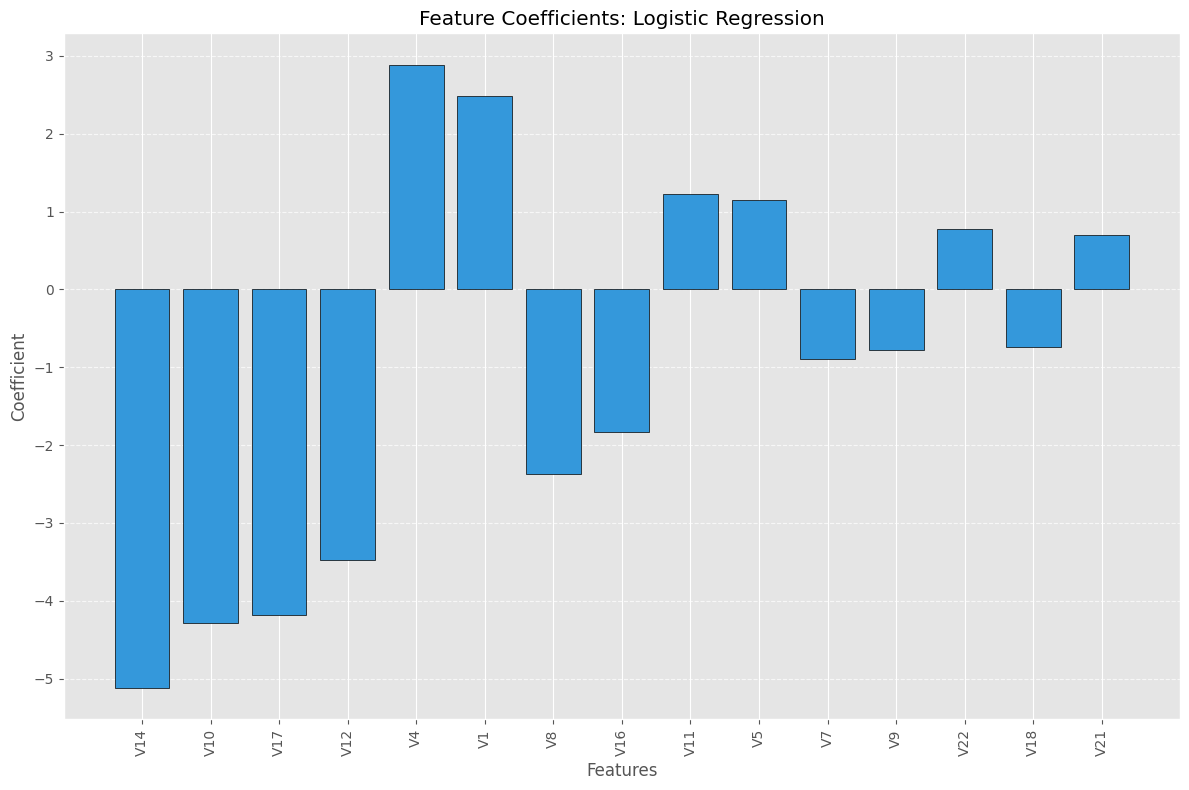

Top 5 important features for Logistic Regression:
  V14: -5.1253
  V10: -4.2826
  V17: -4.1896
  V12: -3.4748
  V4: 2.8891

Feature importance for SVC:
Shape of coefficients: (1, 30)


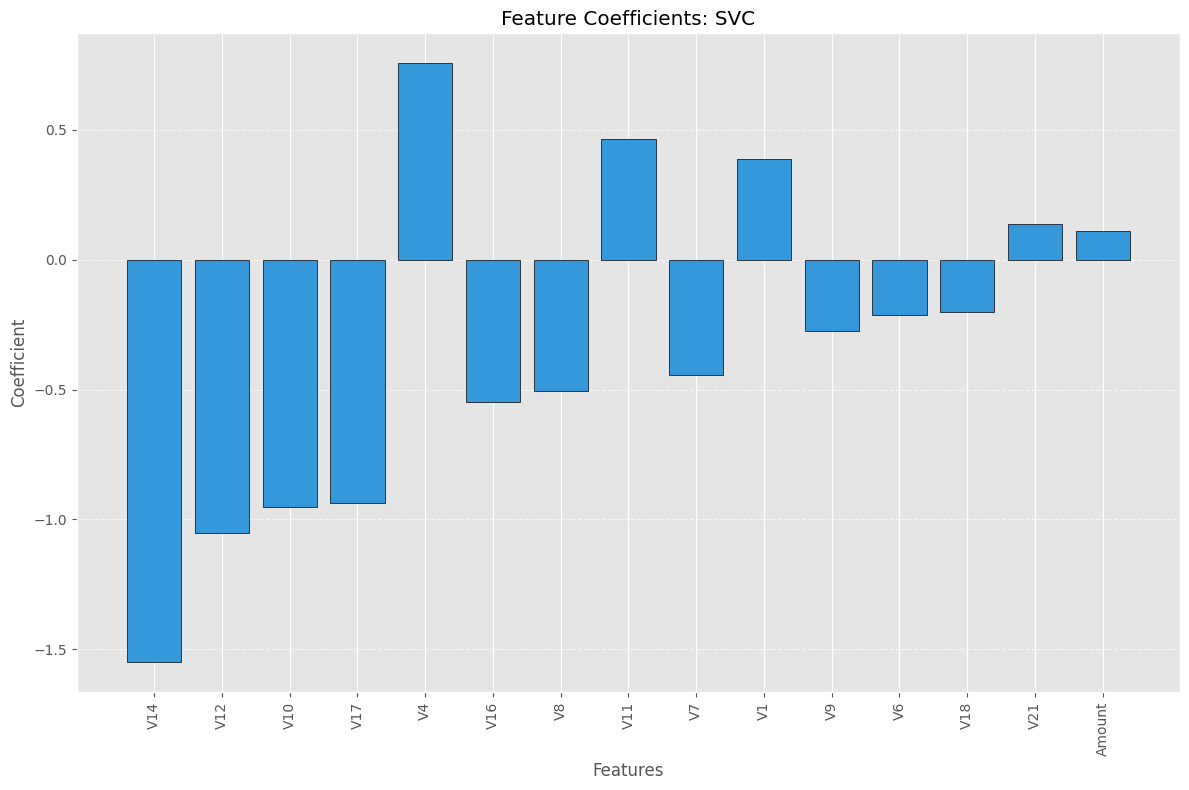

Top 5 important features for SVC:
  V14: -1.5499
  V12: -1.0527
  V10: -0.9529
  V17: -0.9365
  V4: 0.7564

Feature importance for Decision Tree:


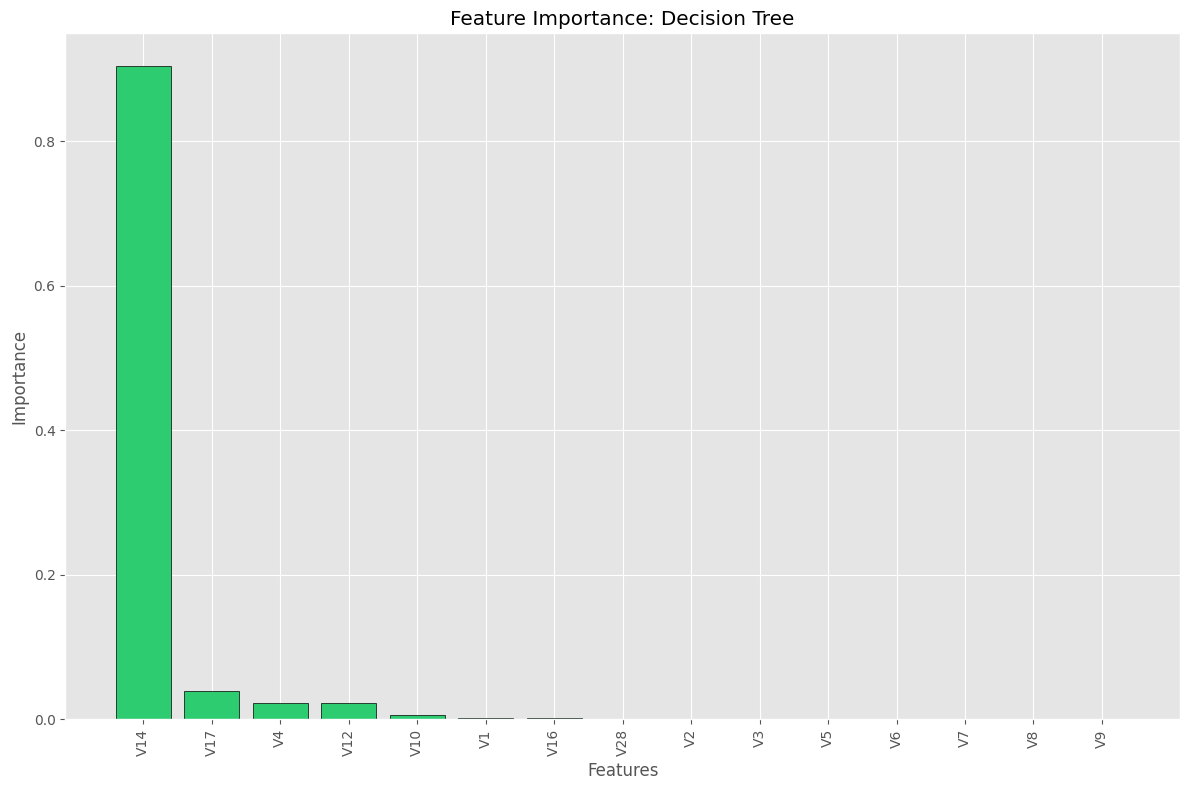

Top 5 important features for Decision Tree:
  V14: 0.9039
  V17: 0.0395
  V4: 0.0229
  V12: 0.0224
  V10: 0.0062

Feature importance for Random Forest:


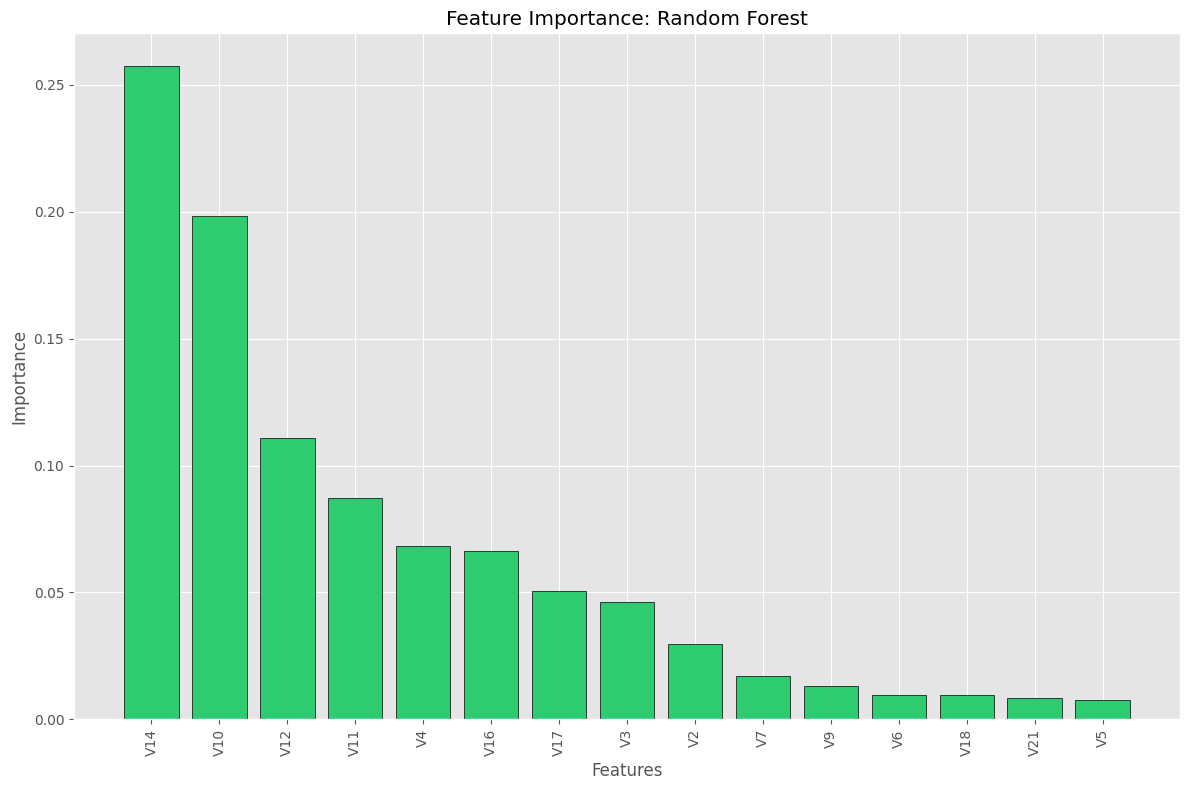

Top 5 important features for Random Forest:
  V14: 0.2573
  V10: 0.1981
  V12: 0.1109
  V11: 0.0872
  V4: 0.0681


In [10]:
feature_names = data.columns.tolist()
feature_names.remove('Class')  # Remove target variable


def plot_feature_importance(model, feature_names, title):
    if hasattr(model, 'feature_importances_'):
        # For tree-based models
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        plt.figure(figsize=(12, 8))
        plt.title(f"Feature Importance: {title}")
        plt.bar(range(len(indices[:15])), importances[indices[:15]],
                color='#2ecc71', edgecolor='black')
        plt.xticks(range(len(indices[:15])), [feature_names[i]
                   for i in indices[:15]], rotation=90)
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.tight_layout()
        plt.show()

        print(f"Top 5 important features for {title}:")
        for i in range(min(5, len(indices))):
            print(
                f"  {feature_names[indices[i]]}: {importances[indices[i]]:.4f}")

    elif hasattr(model, 'coef_'):
        # For linear models like Logistic Regression
        # Handle different shapes of coefficient arrays
        if len(model.coef_.shape) > 1:
            coefficients = model.coef_[0]  # For multi-class classifiers
        else:
            coefficients = model.coef_  # For binary classifiers

        # Get absolute importance for ranking
        importance = np.abs(coefficients)
        indices = np.argsort(importance)[::-1]

        plt.figure(figsize=(12, 8))
        plt.title(f"Feature Coefficients: {title}")

        # Show only top 15 features or all if fewer than 15
        n_features = min(15, len(indices))
        plt.bar(range(n_features),
                coefficients[indices[:n_features]], color='#3498db', edgecolor='black')
        plt.xticks(range(n_features), [feature_names[i]
                   for i in indices[:n_features]], rotation=90)
        plt.xlabel('Features')
        plt.ylabel('Coefficient')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

        print(f"Top 5 important features for {title}:")
        for i in range(min(5, len(indices))):
            print(
                f"  {feature_names[indices[i]]}: {coefficients[indices[i]]:.4f}")
    else:
        print(
            f"Model {title} doesn't provide feature importance or coefficients")


# Run feature importance analysis on the original models
print("\n===== Feature Importance Analysis =====")
for name, clf in models.items():
    if name in ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVC']:
        print(f"\nFeature importance for {name}:")
        # Debug information to help troubleshoot
        if hasattr(clf, 'coef_'):
            print(f"Shape of coefficients: {clf.coef_.shape}")
        plot_feature_importance(clf, feature_names, name)


### 8. Cross-Dataset Validation with Synthetic Data


Evaluating models on Easy synthetic dataset...
  Logistic Regression: Accuracy = 0.8667, ROC AUC = 0.8834
  SVC: Accuracy = 0.8889, ROC AUC = 0.8990
  Decision Tree: Accuracy = 0.8444, ROC AUC = 0.8678
  Random Forest: Accuracy = 0.9556, ROC AUC = 0.9459
  KNN: Accuracy = 0.7778, ROC AUC = 0.8438

Evaluating models on Medium synthetic dataset...
  Logistic Regression: Accuracy = 0.8667, ROC AUC = 0.8606
  SVC: Accuracy = 0.8000, ROC AUC = 0.8137
  Decision Tree: Accuracy = 0.7556, ROC AUC = 0.8053
  Random Forest: Accuracy = 0.8667, ROC AUC = 0.8834
  KNN: Accuracy = 0.8000, ROC AUC = 0.8594

Evaluating models on Hard synthetic dataset...
  Logistic Regression: Accuracy = 0.8095, ROC AUC = 0.8196
  SVC: Accuracy = 0.8333, ROC AUC = 0.8156
  Decision Tree: Accuracy = 0.8810, ROC AUC = 0.8926
  Random Forest: Accuracy = 0.8571, ROC AUC = 0.8117
  KNN: Accuracy = 0.9048, ROC AUC = 0.9310


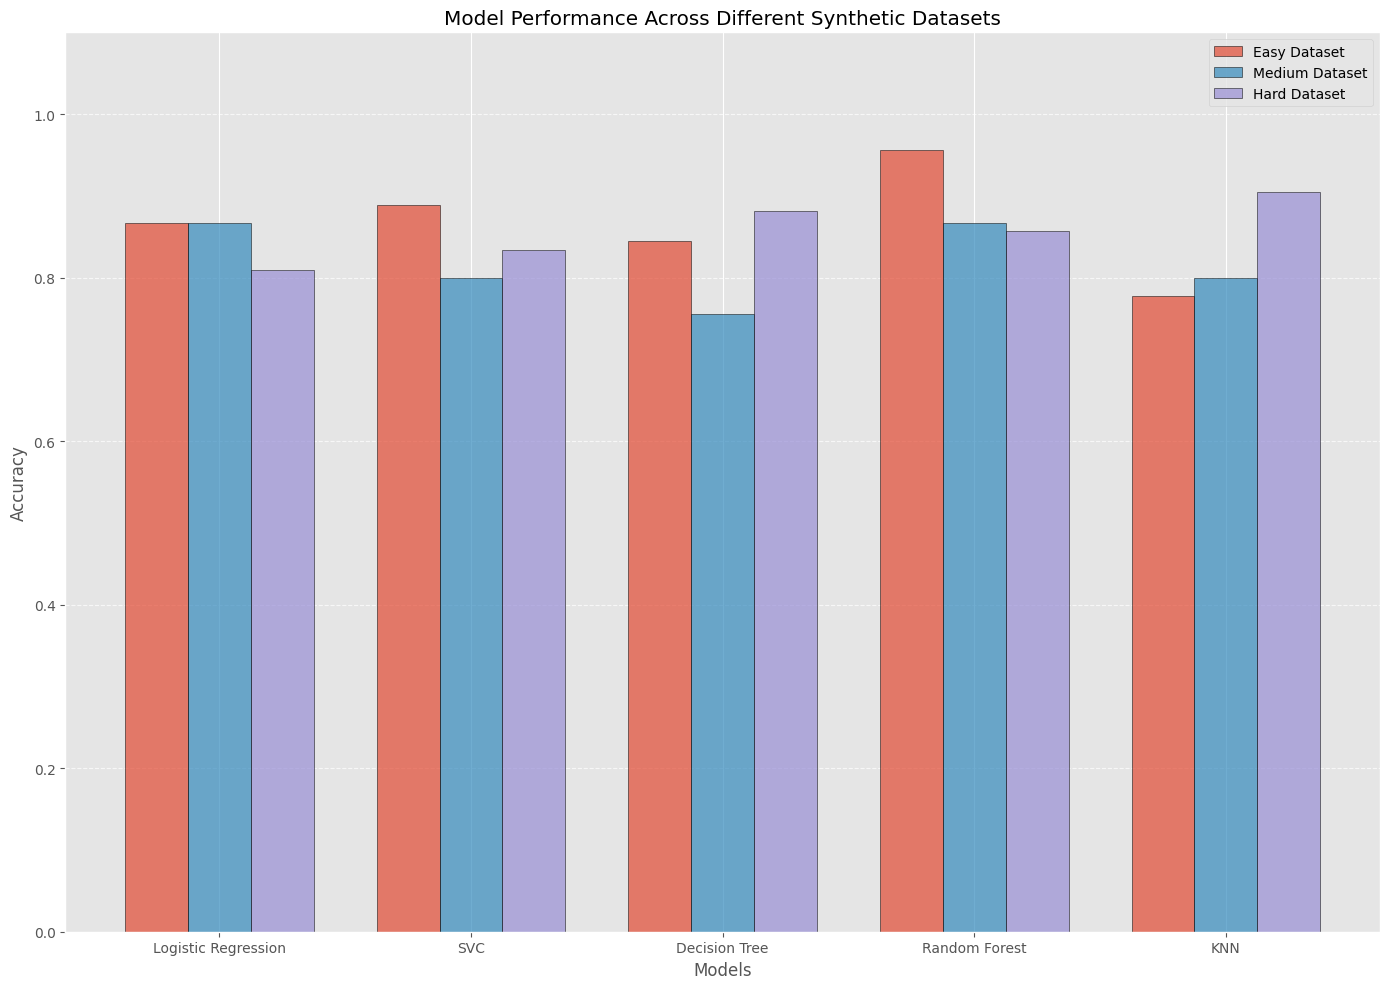

In [11]:
def create_synthetic_datasets():
    X_easy, y_easy = make_classification(
        n_samples=1000, n_features=30, n_informative=10, n_redundant=5, n_classes=2, weights=[0.99, 0.01], random_state=42)
    X_medium, y_medium = make_classification(
        n_samples=1000, n_features=30, n_informative=7, n_redundant=10, n_classes=2, weights=[0.99, 0.01], random_state=42)
    X_hard, y_hard = make_classification(n_samples=1000, n_features=30, n_informative=3,
                                         n_redundant=15, n_classes=2, weights=[0.99, 0.01], random_state=42)
    return [(X_easy, y_easy, "Easy"), (X_medium, y_medium, "Medium"), (X_hard, y_hard, "Hard")]


synthetic_datasets = create_synthetic_datasets()
synthetic_results = []
for X_syn, y_syn, difficulty in synthetic_datasets:
    print(f"\nEvaluating models on {difficulty} synthetic dataset...")
    X_syn_resampled, y_syn_resampled = pipeline.fit_resample(X_syn, y_syn)
    X_syn_scaled = scaler.fit_transform(X_syn_resampled)
    X_syn_train, X_syn_test, y_syn_train, y_syn_test = train_test_split(
        X_syn_scaled, y_syn_resampled, test_size=0.20, random_state=2)
    for name, clf in models.items():
        clf.fit(X_syn_train, y_syn_train)
        y_pred = clf.predict(X_syn_test)
        acc = accuracy_score(y_syn_test, y_pred)
        roc = roc_auc_score(y_syn_test, y_pred)
        synthetic_results.append(
            {'Model': name, 'Dataset': difficulty, 'Accuracy': acc, 'ROC AUC': roc})
        print(f"  {name}: Accuracy = {acc:.4f}, ROC AUC = {roc:.4f}")

synthetic_df = pd.DataFrame(synthetic_results)
plt.figure(figsize=(14, 10))
models_list = synthetic_df['Model'].unique()
datasets = synthetic_df['Dataset'].unique()
x = np.arange(len(models_list))
width = 0.25
for i, dataset in enumerate(datasets):
    data_subset = synthetic_df[synthetic_df['Dataset'] == dataset]
    offset = (i - 1) * width
    plt.bar(x + offset, data_subset['Accuracy'], width,
            label=f'{dataset} Dataset', alpha=0.7, edgecolor='black')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Across Different Synthetic Datasets')
plt.xticks(x, models_list)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()
